# Imports

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from plotly         import express as px
import scipy.stats as ss


# Reanding dataset

In [2]:
df = pd.read_excel('../datasets/all_games.xlsx')

In [3]:
df.head()

,Concurso,Data,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6
0,2695,02/03/2024,40,33,34,17,15,32
1,2694,29/02/2024,41,22,7,20,58,29
2,2693,27/02/2024,50,29,44,11,46,45
3,2692,24/02/2024,56,33,55,45,9,59
4,2691,22/02/2024,15,28,40,37,57,13


In [ ]:
# Criando os dados
data = [
    list(range(51, 61)),
    list(range(41, 51)),
    list(range(31, 41)),
    list(range(21, 31)),
    list(range(11, 21)),
    list(range(1, 11))
]

# Criando o DataFrame
m_matrix = pd.DataFrame(data, columns=[str(i) for i in range(1, 11)])
m_matrix 

,1,2,3,4,5,6,7,8,9,10
0,51,52,53,54,55,56,57,58,59,60
1,41,42,43,44,45,46,47,48,49,50
2,31,32,33,34,35,36,37,38,39,40
3,21,22,23,24,25,26,27,28,29,30
4,11,12,13,14,15,16,17,18,19,20
5,1,2,3,4,5,6,7,8,9,10


In [49]:

# Criando a matriz de quantidade de bolas
m_matrix = pd.pivot_table(result_df, index='quantidade_bola 1', columns='bola 1', values='quantidade_bola 1', aggfunc='count', fill_value=0)

# Criando o heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(m_matrix, cmap='Blues', annot=True, fmt='d', cbar_kws={'label': 'Quantidade de Bolas'})
plt.title('Heatmap da Quantidade de Bolas Sorteadas')
plt.xlabel('Número da Bola')
plt.ylabel('Quantidade de Bolas')
plt.show()

ValueError: Grouper for 'quantidade_bola 1' not 1-dimensional

In [46]:
value_counts_dfs = []

# Calculando a contagem de valores para cada coluna
for i in range(1, 7):
    column_name = f'bola {i}'
    value_counts_df = df[column_name].value_counts().reset_index()
    value_counts_df.columns = [column_name, f'quantidade_{column_name}']
    value_counts_dfs.append(value_counts_df)

# Concatenando os DataFrames ao longo do eixo das colunas
result_df = pd.concat(value_counts_dfs, axis=1)
result_df.head(20)

,bola 1,quantidade_bola 1,bola 2,quantidade_bola 2,bola 3,quantidade_bola 3,bola 4,quantidade_bola 4,bola 5,quantidade_bola 5,bola 6,quantidade_bola 6
0,28,60,5,63,27,61,37,63,35,64,23,61
1,32,57,10,61,56,58,29,60,10,56,33,55
2,4,57,32,60,41,56,60,56,44,55,53,55
3,49,56,53,58,34,56,36,53,16,55,10,54
4,35,55,8,57,18,54,43,52,45,55,57,53
5,44,54,17,55,58,54,53,52,42,54,30,53
6,47,54,39,54,38,54,23,51,34,53,22,52
7,53,53,49,53,30,52,11,51,38,52,16,52
8,30,53,42,53,29,52,10,51,52,52,17,52
9,46,53,21,53,54,51,1,51,14,52,34,51


In [31]:
filtered_df = df[df.isin([23]).any(axis=1)]

filtered_df.shape

(290, 8)

In [45]:
import pandas as pd
from itertools import combinations
sequences_count = {}

# Percorre todas as linhas do DataFrame
for index, row in df.iterrows():
    # Transforma a linha em uma sequência de números
    sequence = ''.join(map(str, row.values))
    # Itera sobre todas as sequências de 5 números consecutivos
    for i in range(len(sequence) - 4):
        five_sequence = sequence[i:i+5]
        if five_sequence not in sequences_count:
            sequences_count[five_sequence] = 0
        sequences_count[five_sequence] += 1

# Ordena as sequências de acordo com a contagem de ocorrências
sorted_sequences = sorted(sequences_count.items(), key=lambda x: x[1], reverse=True)

print("As 5 sequências de 5 números consecutivos mais comuns:")
for sequence, count in sorted_sequences[:5]:
    print(sequence, "apareceu", count, "vezes")

As 5 sequências de 5 números consecutivos mais comuns:
/08/2 apareceu 222 vezes
08/20 apareceu 222 vezes
/10/2 apareceu 218 vezes
10/20 apareceu 218 vezes
/01/2 apareceu 213 vezes


In [43]:
# Sequência que você quer verificar
# sequencia = [28, 5, 27, 37, 35, 23]
sequencia = [28, 27]


# Filtrando o DataFrame para linhas que contenham a sequência
filtered_df = df[df.apply(lambda row: all(x in row.values for x in sequencia), axis=1)]
filtered_df

,Concurso,Data,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6
55,2640,03/10/2023,27,32,28,8,4,10
61,2634,19/09/2023,56,8,28,48,32,27
302,2393,24/07/2021,32,28,38,51,27,26
359,2336,20/01/2021,20,27,50,8,10,28
416,2279,14/07/2020,28,12,20,5,27,14
424,2271,17/06/2020,6,10,41,52,27,28
458,2237,27/02/2020,60,27,28,20,53,11
499,2196,09/10/2019,56,28,27,1,41,25
649,2046,02/06/2018,27,11,6,28,46,3
795,1900,04/02/2017,46,11,8,43,28,27


In [4]:
aux = df.drop(['Concurso', 'Data'], axis=1)

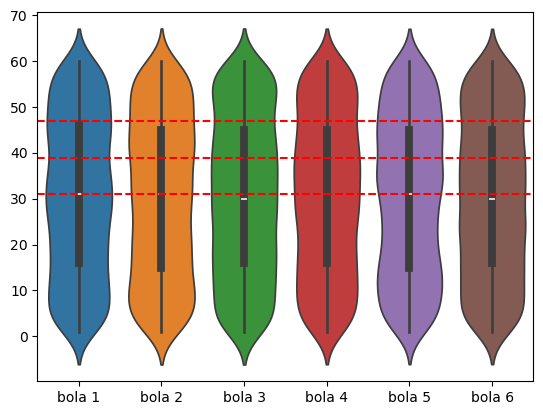

In [42]:
sns.violinplot(aux)
plt.axhline(y=31, color='r', linestyle='--')
plt.axhline(y=39, color='r', linestyle='--')
plt.axhline(y=47, color='r', linestyle='--')


In [6]:
# Criando os dados
data = [
    list(range(51, 61)),
    list(range(41, 51)),
    list(range(31, 41)),
    list(range(21, 31)),
    list(range(11, 21)),
    list(range(1, 11))
]

# Criando o DataFrame
m_matrix = pd.DataFrame(data, columns=[str(i) for i in range(1, 11)])
m_matrix 

,1,2,3,4,5,6,7,8,9,10
0,51,52,53,54,55,56,57,58,59,60
1,41,42,43,44,45,46,47,48,49,50
2,31,32,33,34,35,36,37,38,39,40
3,21,22,23,24,25,26,27,28,29,30
4,11,12,13,14,15,16,17,18,19,20
5,1,2,3,4,5,6,7,8,9,10


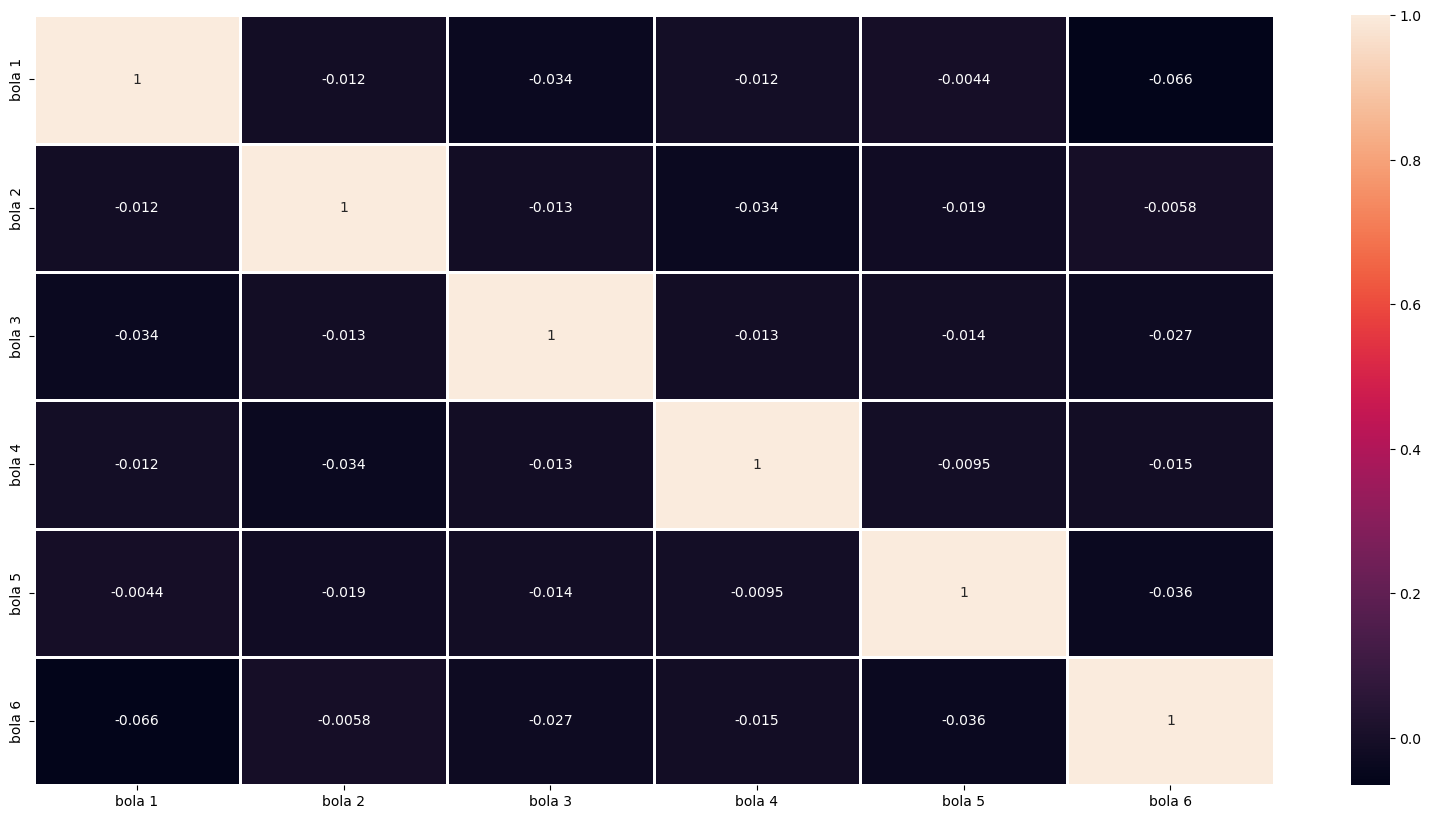

In [7]:
plt.figure(figsize=(20,10))
correlation = aux.corr(method='spearman')
sns.heatmap(correlation, annot=True, linewidths=2);